In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
import torch
import time
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel
from scipy.linalg import svd

from sklearn.metrics.pairwise import linear_kernel

sys.path.insert(0,os.path.abspath('/notebooks/3108Dif'))
sys.path.insert(0,os.path.abspath('/notebooks/pytorchtimseries'))
from tqdm.notebook import tqdm



from src.experiments.NsDiff import NsDiffForecast


In [2]:
from torch_timeseries.dataset import ExchangeRate, ETTh1, ETTh2, ETTm1, ETTm2, Traffic, SolarEnergy, Electricity, ILI
from src.utils.sigma import wv_sigma
dataset_path = "../data/"

## ExchangeRate

In [7]:
dataset = ExchangeRate(root=dataset_path)

Using downloaded and verified file: ../data/ExchangeRate/exchange_rate.csv


In [8]:
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]

In [13]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]

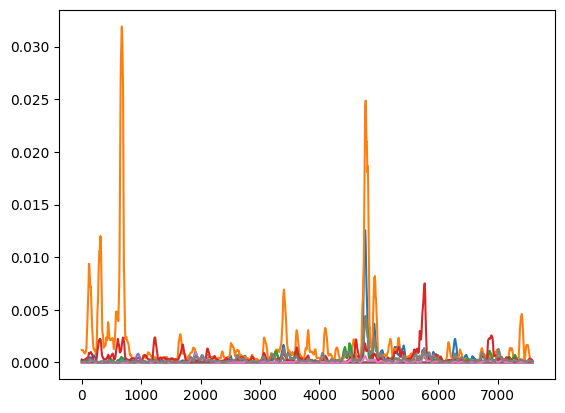

In [ ]:
# plt.plot(variance)

In [ ]:
r = (test_variance.mean(0)/train_variance.mean(0))
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor([0.7596, 0.3633, 0.8179, 0.7830, 0.4166, 0.8422, 0.8450, 0.8078],
        dtype=torch.float64),
 tensor(6))

## ETTm1

Using downloaded and verified file: ../data/ETTm1/ETTm1.csv


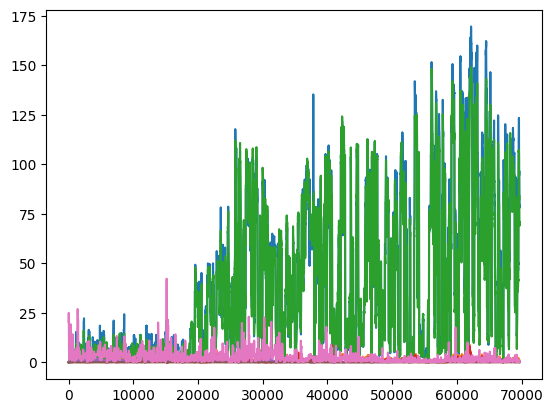

In [ ]:
dataset = ETTm1(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

In [25]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(2.5284, dtype=torch.float64), tensor(0))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Using downloaded and verified file: ../data/ETTm1/ETTm1.csv


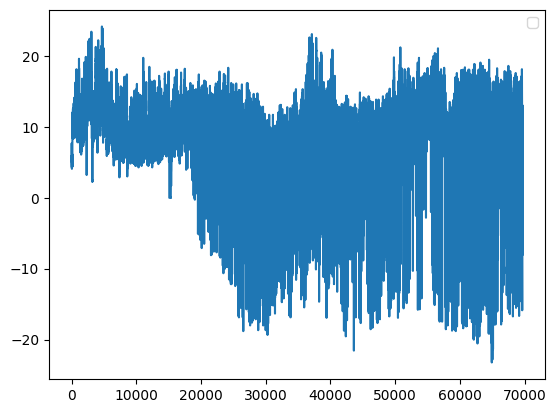

In [43]:
dataset = ETTm1(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
# variance = wv_sigma(data, 96)[0, :, :]
plt.plot(dataset.data[:, 0])
plt.legend()

## ETTm2

In [26]:
dataset = ETTm2(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/ETTm2/ETTm2.csv


In [27]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(1.2748, dtype=torch.float64), tensor(6))

## ETTh1

In [28]:
dataset = ETTh1(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/ETTh1/ETTh1.csv


In [29]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(2.4979, dtype=torch.float64), tensor(0))

## ETTh2

In [30]:
dataset = ETTh2(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/ETTh2/ETTh2.csv


In [31]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(1.2915, dtype=torch.float64), tensor(6))

### SolarEnergy

In [32]:
dataset = SolarEnergy(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/solar_AL/solar_AL.txt.gz
Extracting ../data/solar_AL/solar_AL.txt.gz to ../data/solar_AL


In [33]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(0.9156, dtype=torch.float64), tensor(31))

## ILI

In [34]:
dataset = ILI(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/ILI/illness.zip
Extracting ../data/ILI/illness.zip to ../data/ILI


In [35]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(8.2645, dtype=torch.float64), tensor(4))

Using downloaded and verified file: ../data/ILI/illness.zip
Extracting ../data/ILI/illness.zip to ../data/ILI


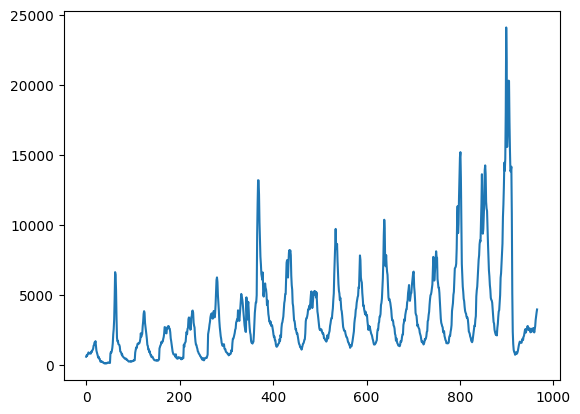

In [53]:
dataset = ILI(root=dataset_path)
data = torch.tensor(dataset.data)
plt.plot(data[:, 2])

## ECL

In [36]:
dataset = Electricity(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/electricity/electricity.csv


In [37]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(3.9441, dtype=torch.float64), tensor(245))

## Traffic

In [38]:
dataset = Traffic(root=dataset_path)
data = torch.tensor(dataset.data).unsqueeze(0)
variance = wv_sigma(data, 96)[0, :, :]
# plt.plot(variance)

Using downloaded and verified file: ../data/traffic/traffic.txt.gz
Extracting ../data/traffic/traffic.txt.gz to ../data/traffic


In [39]:
train_variance = variance[:int(len(variance)*0.7)]
test_variance = variance[-int(len(variance)*0.2):]
r = (test_variance.mean(0)/train_variance.mean(0)).max()
r, (test_variance.mean(0)/train_variance.mean(0)).argmax()

(tensor(181.8328, dtype=torch.float64), tensor(840))